In [1]:
# pip install seaborn

In [2]:
# import necessary modules to run code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats

In [3]:
#importing secchi data files
file_path = '/home/jovyan/EmmaIacono/194903-202105_Cast_nccsv.csv'
secchi= pd.read_csv(file_path, skiprows = 218, low_memory= False)
#file contains metadata row 1-219
#so we are skipping indices 0-218

# Create a new dataframe called df so that we can add a new 'Distance_with_*' column
# Filter data by year
df_2006 = secchi[secchi['Year']>2006]

cond_year1 = df_2006['Year']<2014
cond_year2 = df_2006['Year']>2016
df = df_2006[cond_year1 | cond_year2]

In [4]:

df['Distance_with_*'] = df['Distance'] * -1.852

# Create a new dataframe that contains all the columns where distance_with_* is less than equal to 150
df_inshore = df[(df['Distance_with_*']<=150)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 450
df_offshore = df[(df['Distance_with_*']>450)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 150 and less than/ equal to 450
cond1 = df['Distance_with_*']<=450
cond2 = df['Distance_with_*']>150
df_transition = df[cond1 & cond2]



### In shore ###

# Group filtered data by year
df_inshore_year = df_inshore.groupby('Year')

# Calculate median of secchi data by year
df_inshore_secchi_median = df_inshore_year.Secchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
inshore_N = df_inshore_year.Secchi.count().values

# Plot x versus y
x_inshore = df.Year.unique()
y_inshore = df_inshore_year.Secchi.median()
y_inshore_std_error = df_inshore_year.Secchi.std()/np.sqrt(inshore_N)



### Transition shore ###

# Group filtered data by year
df_transition_year = df_transition.groupby('Year')

# Calculate median of secchi data by year
df_transition_secchi_median = df_transition_year.Secchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
transition_N = df_transition_year.Secchi.count().values

# Plot x versus y
x_transition = df.Year.unique()
y_transition = df_transition_year.Secchi.median()   
y_transition_std_error = df_transition_year.Secchi.std()/np.sqrt(transition_N)



### Off shore ###

# Group filtered data by year
df_offshore_year = df_offshore.groupby('Year')
                                                                                                                                                                                                                            
# Calculate median of secchi data by year
df_offshore_secchi_median = df_offshore_year.Secchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
offshore_N = df_offshore_year.Secchi.count().values

# Plot x versus y
x_offshore = df_year_values
y_offshore = df_offshore_year.Secchi.median()
y_offshore_std_error = df_offshore_year.Secchi.std()/(np.sqrt(offshore_N))


/tmp/ipykernel_556/1439234752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance_with_*'] = df['Distance'] * -1.852


In [5]:
### Upgrade Seaborn library, dependancies = NumPY, Pandas, Matplotlib
# !python -m pip uninstall seaborn --yes
#pip install git+https://github.com/mwaskom/seaborn.git

In [6]:
# pip install seaborn

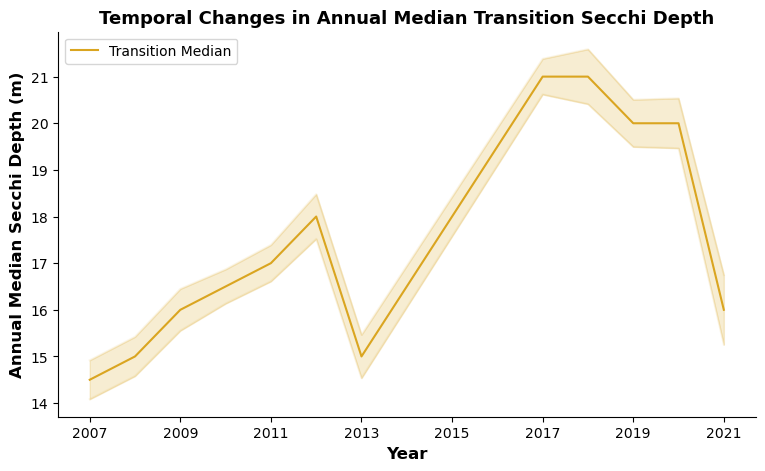

In [7]:

### Transition ###
#Centering error around median
error_2 = 0.5*y_transition_std_error 
lower_2 = df_transition_secchi_median - error_2
upper_2 = df_transition_secchi_median + error_2

x = df_year_values
y_transition_median = df_transition_secchi_median


### Plotting ###

# Draw plot with error band and extra formatting to match seaborn style
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(x, y_transition_median, label='Transition Median', color='goldenrod')
ax.plot(x, lower_2, color='goldenrod', alpha=0.1)
ax.plot(x, upper_2, color='goldenrod', alpha=0.1)
ax.fill_between(x, lower_2, upper_2, color='goldenrod', alpha=0.2)


ax.legend()
# ax.legend(labels=['Inshore','Transition','Offshore'])
ax.set_xlabel(('Year'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel(('Annual Median Secchi Depth (m)'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(('Temporal Changes in Annual Median Transition Secchi Depth'), fontdict = {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})
ax.set_xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]) 


# plt.show()
# fig = ax.get_figure()
# fig.savefig('./figures/Transition_median_Secchi_depth.png')

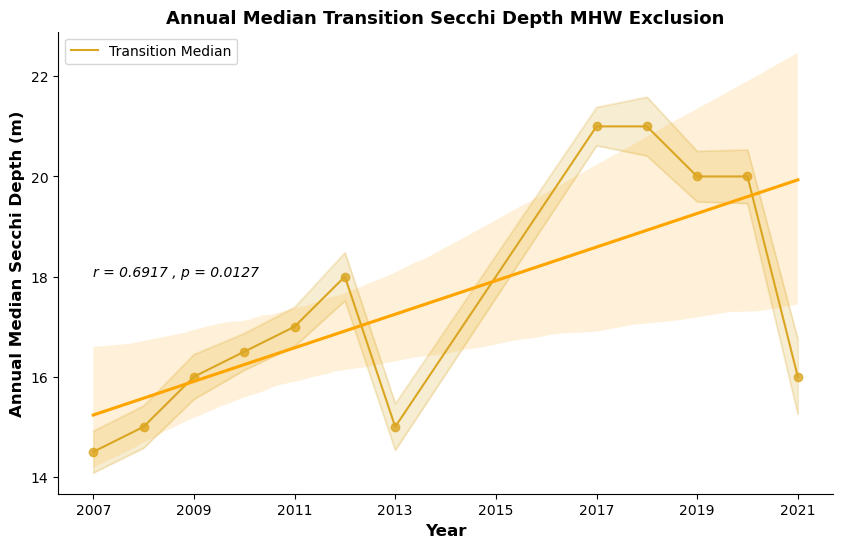

Pearson Results:  [PearsonRResult(statistic=0.6917268792552673, pvalue=0.012698435668990893)]


In [8]:
### Regression Plots & Pearson Coefficients for Median Secchi Depth ###

# Draw plot with error band and extra formatting to match seaborn style
fig, ax = plt.subplots(figsize=(10,6))

## Transition ##
ax.plot(x, y_transition_median, label='Transition Median', color='goldenrod')
ax.plot(x, lower_2, color='goldenrod', alpha=0.1)
ax.plot(x, upper_2, color='goldenrod', alpha=0.1)
ax.fill_between(x, lower_2, upper_2, color='goldenrod', alpha=0.2)

chart = sns.regplot(x=x, y=y_transition_median, scatter_kws={"color": "goldenrod"}, line_kws={"color": "orange"}) 

stat_transition = stats.pearsonr(x, y_transition_median)  # Calculating Pearson Coefficients

chart_text = 'r = ' + str(round(stat_transition[0],4)) + ' , ' + 'p = ' + str(round(stat_transition[1],4))
chart.text(2007,18, chart_text, style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})

## Plotting ##
ax.legend()
plt.legend(loc='upper left')
# ax.legend(labels=['Inshore','Transition','Offshore'])
ax.set_xlabel(('Year'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel(('Annual Median Secchi Depth (m)'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(('Annual Median Transition Secchi Depth MHW Exclusion'), fontdict = {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})
ax.set_xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]) 



plt.show()
fig = ax.get_figure()
fig.savefig('./figures/MHW_Exclusion_Transition_median_Secchi_depth_regression.png')

stat_coeff = [stat_transition]
print('Pearson Results: ', stat_coeff)

# coeff_inshore = stat_inshore[0]
# p_value_inshore = stat_inshore[1]

/tmp/ipykernel_556/1425867605.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transition['ReciprocalSecchi'] = 1/df_transition.Secchi


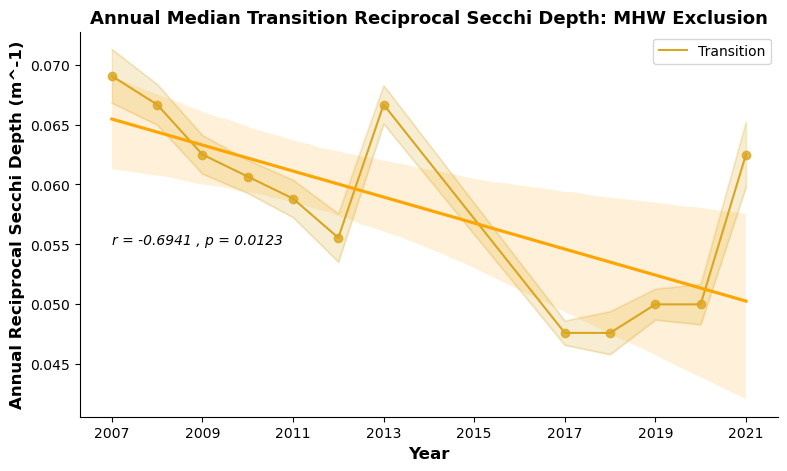

Pearson Results:  [PearsonRResult(statistic=-0.6940799672003931, pvalue=0.012275402541001778)]


In [10]:
## Reciprocal Median Secchi Depth Graph ###

### Transition ###

# Invert Secchi depth data
df_transition['ReciprocalSecchi'] = 1/df_transition.Secchi

df_transition.ReciprocalSecchi


# Group filtered data by year
df_transition_year = df_transition.groupby('Year')

# Calculate median of reciprocal secchi data by year
df_transition_secchi_median = df_transition_year.ReciprocalSecchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
transition_N = df_transition_year.Secchi.count().values

# Plot x versus y
x_transition = df_year_values
y_transition = df_transition_year.ReciprocalSecchi.median()
y_transition_std_error = df_transition_year.ReciprocalSecchi.std()/(np.sqrt(transition_N))

# Centering error around median
error_2 = 0.5*y_transition_std_error 
lower_2 = df_transition_secchi_median - error_2
upper_2 = df_transition_secchi_median + error_2

x = df_year_values
y_transition_median = df_transition_secchi_median



### Plotting ###

# Draw plot with error band and extra formatting to match seaborn style
fig, ax = plt.subplots(figsize=(9,5))

## Transition plot
ax.plot(x, y_transition_median, label='Transition', color='goldenrod')
ax.plot(x, lower_2, color='goldenrod', alpha=0.1)
ax.plot(x, upper_2, color='goldenrod', alpha=0.1)
ax.fill_between(x, lower_2, upper_2, color='goldenrod', alpha=0.2)

chart = sns.regplot(x=x, y=y_transition_median, scatter_kws={"color": "goldenrod"}, line_kws={"color": "orange"}) 

stat_transition = stats.pearsonr(x, y_transition_median)  # Calculating Pearson Coefficients

chart_text = 'r = ' + str(round(stat_transition[0],4)) + ' , ' + 'p = ' + str(round(stat_transition[1],4))
chart.text(2007,0.055, chart_text, style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})


## Titles and such
ax.legend()
# ax.legend(labels=['Inshore','Transition','Offshore'])
ax.set_xlabel(('Year'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel(('Annual Reciprocal Secchi Depth (m^-1)'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(('Annual Median Transition Reciprocal Secchi Depth: MHW Exclusion'), fontdict = {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})
ax.set_xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]) 

plt.show()
fig = ax.get_figure()
fig.savefig('./figures/MHW_Exclusion_Transition_Reciprocal_Median_Secchi_depth_Regression.png')

stat_coeff = [stat_transition]
print('Pearson Results: ', stat_coeff)